### Numerical Evaluation of the Exponential Integral Using `scipy.integrate.quad`

We compute the exponential integral:

$$
E_n(x) = \int_1^\infty \frac{e^{-xt}}{t^n} \, dt
$$

This is an improper integral with an infinite upper bound. We use `scipy.integrate.quad` with `np.inf` and pass parameters $n$ and $x$ using the `args` argument.

#### Example Cases

- Case 1: $n = 2$, $x = 1$
- Case 2: $n = 3$, $x = 0.5$

We evaluate both numerically and visualize the integrand with shaded area.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [8]:
# Case 1: n = 2, x = 1
E1, err1 = quad(integrand, 1, np.inf, args=(2, 1))

# Case 2: n = 3, x = 0.5
E2, err2 = quad(integrand, 1, np.inf, args=(3, 0.5))

# Display results
print("Exponential Integral Results:")
print(f"  Case 1 (n=2, x=1):     E_n(x) = {E1:.6f}, error = {err1:.2e}")
print(f"  Case 2 (n=3, x=0.5):   E_n(x) = {E2:.6f}, error = {err2:.2e}")

Exponential Integral Results:
  Case 1 (n=2, x=1):     E_n(x) = 0.148496, error = 3.87e-10
  Case 2 (n=3, x=0.5):   E_n(x) = 0.221604, error = 2.56e-09


In [9]:
# Define the integrand: e^{-xt} / t^n
def integrand(t, n, x):
    return np.exp(-x * t) / t**n

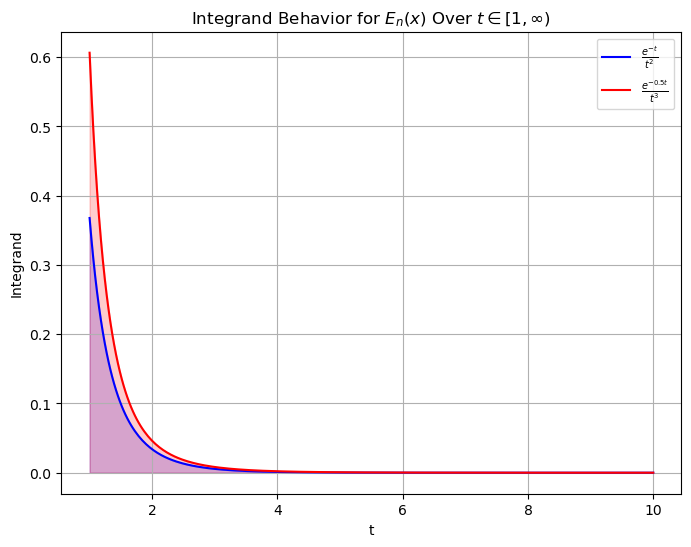

In [10]:
# Plot integrand for both cases
t_vals = np.linspace(1, 10, 300)
y1 = integrand(t_vals, 2, 1)
y2 = integrand(t_vals, 3, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(t_vals, y1, 'b-', label='$\\frac{e^{-t}}{t^2}$')
plt.plot(t_vals, y2, 'r-', label='$\\frac{e^{-0.5t}}{t^3}$')

# Fill area under curves
plt.fill_between(t_vals, 0, y1, color='blue', alpha=0.2)
plt.fill_between(t_vals, 0, y2, color='red', alpha=0.2)

plt.xlabel('t')
plt.ylabel('Integrand')
plt.title('Integrand Behavior for $E_n(x)$ Over $t \\in [1, \\infty)$')
plt.grid(True)
plt.legend()
plt.show()